In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import DBSCAN

In [2]:
#readfile
rawdata=pd.read_csv('HW4_house-prices.csv')
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',30)

In [3]:
#preprocessing
rawdata.fillna(rawdata.mean())
rawdata.dropna(axis=1,inplace=True)

In [4]:
rawdata=pd.get_dummies(rawdata)
rawdata

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,

In [5]:
#data slice
y=rawdata['SalePrice']
X=rawdata.drop(columns='SalePrice')
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [6]:
regr=linear_model.LinearRegression()
rid=linear_model.Ridge()
lso=linear_model.Lasso()

regr.fit(X_train,y_train)
rid.fit(X_train,y_train)
lso.fit(X_train,y_train)

y_pred_regr=regr.predict(X_test)
y_pred_rid=rid.predict(X_test)
y_pred_lso=lso.predict(X_test)


rid_MSE=mean_squared_error(y_test, y_pred_rid,squared=False)
regr_MSE=mean_squared_error(y_test, y_pred_regr,squared=False)
lso_MSE=mean_squared_error(y_test, y_pred_lso,squared=False)
MSE={'regr':regr_MSE,'rid':rid_MSE,'lso':lso_MSE}
min_MSE = min(MSE, key=MSE.get)


# df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# df

/home/heisenberg/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87564043864.85944, tolerance: 615098412.8205525
  model = cd_fast.enet_coordinate_descent(


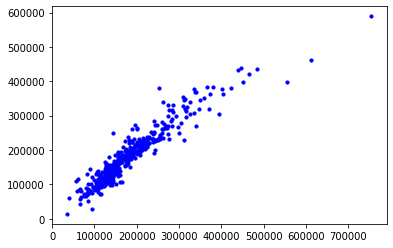

In [7]:
#best scatter plot
if min_MSE == 'regr':
    plt.scatter(y_test,y_pred_regr,color='blue',s=10)
if min_MSE == 'rid':
    plt.scatter(y_test,y_pred_rid,color='blue',s=10)
if min_MSE == 'lso':
    plt.scatter(y_test,y_pred_lso,color='blue',s=10)
plt.show()

In [8]:
X_train_sc=preprocessing.StandardScaler()
X_test_sc=preprocessing.StandardScaler()
y_train_sc=preprocessing.StandardScaler()
X_train_sc.fit(X_train)
X_test_sc.fit(X_test)
y_train = np.array(y_train).reshape(-1, 1)
y_train_sc.fit(y_train)
std_X_train=X_train_sc.transform(X_train)
std_X_test=X_test_sc.transform(X_test)
std_y_train=y_train_sc.transform(y_train)

regr.fit(std_X_train,std_y_train)
rid.fit(std_X_train,std_y_train)
lso.fit(std_X_train,std_y_train)

std_y_pred_regr=regr.predict(std_X_test)
std_y_pred_rid=rid.predict(std_X_test)
std_y_pred_lso=lso.predict(std_X_test)

std_y_pred_regr=y_train_sc.inverse_transform(std_y_pred_regr)
std_y_pred_rid=y_train_sc.inverse_transform(std_y_pred_rid)
std_y_pred_lso=y_train_sc.inverse_transform(std_y_pred_lso)

std_rid_MSE=mean_squared_error(y_test, std_y_pred_rid,squared=False)
std_regr_MSE=mean_squared_error(y_test, std_y_pred_regr,squared=False)
std_lso_MSE=mean_squared_error(y_test, std_y_pred_lso,squared=False)
std_MSE={'regr':std_regr_MSE,'rid':std_rid_MSE,'lso':std_lso_MSE}
print('Original:       ',MSE)
print('Standardization:',std_MSE)


Original:        {'regr': 28041.67651389797, 'rid': 28714.401348718176, 'lso': 27138.174826581882}
Standardization: {'regr': 3.814764824066993e+16, 'rid': 27095.27540806148, 'lso': 83545.17795000924}


Original:        {'regr': 28041.67651389797, 'rid': 28714.401348718176, 'lso': 27138.174826581882}
Standardization: {'regr': 3.814764824066993e+16, 'rid': 27095.27540806148, 'lso': 83545.17795000924}
Top 4 corr:      {'regr': 40511.413173828805, 'rid': 40505.83185271425, 'lso': 40511.04291192697}
Least 4 corr:    {'regr': 83552.86739524147, 'rid': 83550.99735432473, 'lso': 83552.53658856463}


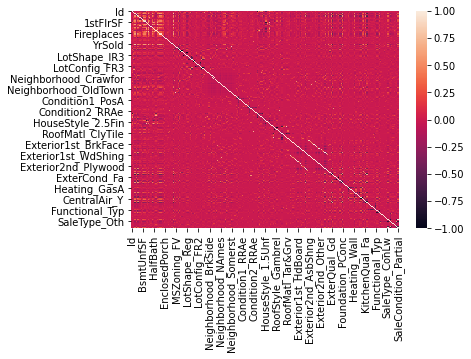

In [9]:
corr_data=rawdata.corr()
sns.heatmap(corr_data)
corr_data=abs(corr_data)
corr_data=corr_data['SalePrice'].sort_values(ascending=False)
top4=corr_data[1:5]
end4=corr_data[-4:]
#print(end4)
#print(corr_data)
top4_X_train=X_train[top4.index]
top4_X_test=X_test[top4.index]

regr.fit(top4_X_train,y_train)
rid.fit(top4_X_train,y_train)
lso.fit(top4_X_train,y_train)

top4_y_pred_regr=regr.predict(top4_X_test)
top4_y_pred_rid=rid.predict(top4_X_test)
top4_y_pred_lso=lso.predict(top4_X_test)


rid_MSE=mean_squared_error(y_test, top4_y_pred_rid,squared=False)
regr_MSE=mean_squared_error(y_test, top4_y_pred_regr,squared=False)
lso_MSE=mean_squared_error(y_test, top4_y_pred_lso,squared=False)
top4_MSE={'regr':regr_MSE,'rid':rid_MSE,'lso':lso_MSE}

end4_X_train=X_train[end4.index]
end4_X_test=X_test[end4.index]

regr.fit(end4_X_train,y_train)
rid.fit(end4_X_train,y_train)
lso.fit(end4_X_train,y_train)

end4_y_pred_regr=regr.predict(end4_X_test)
end4_y_pred_rid=rid.predict(end4_X_test)
end4_y_pred_lso=lso.predict(end4_X_test)


rid_MSE=mean_squared_error(y_test, end4_y_pred_rid,squared=False)
regr_MSE=mean_squared_error(y_test, end4_y_pred_regr,squared=False)
lso_MSE=mean_squared_error(y_test, end4_y_pred_lso,squared=False)
end4_MSE={'regr':regr_MSE,'rid':rid_MSE,'lso':lso_MSE}
print('Original:       ',MSE)
print('Standardization:',std_MSE)
print('Top 4 corr:     ',top4_MSE)
print('Least 4 corr:   ',end4_MSE)

<AxesSubplot:xlabel='price', ylabel='area'>

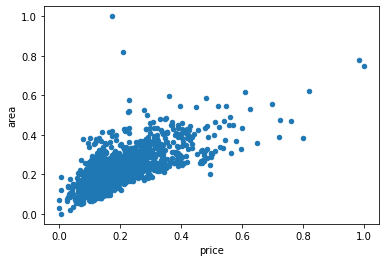

In [10]:
scaler=MinMaxScaler()
price_and_area=scaler.fit_transform(rawdata[['SalePrice','GrLivArea']])
price_and_area=pd.DataFrame(price_and_area,columns=['price','area'])
price_and_area.plot.scatter(x='price',y='area')

<function matplotlib.pyplot.show(close=None, block=None)>

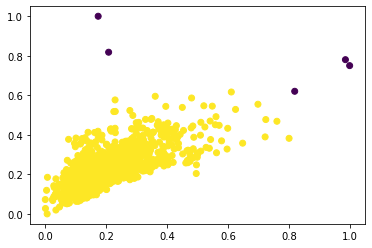

In [11]:
dbs=DBSCAN(eps=0.1).fit_predict(price_and_area)
plt.scatter(price_and_area['price'],price_and_area['area'],c=dbs)
plt.show